In [1]:
#import dependencies
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

In [2]:
#import the csv file for L station entries
monthly_df = pd.read_csv("Resources/CTA_-_Ridership_-__L__Station_Entries_-_Monthly_Day-Type_Averages___Totals_2019.csv")

In [3]:
#double check the headers to see which ones we have to rename
monthly_df.head()

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal
0,40900,Howard,1/1/2014,5665.7,4130.3,3042.2,156378
1,41190,Jarvis,1/1/2014,1509.8,1363.0,1025.6,43795
2,40100,Morse,1/1/2014,3652.2,3075.5,2350.6,104404
3,41300,Loyola,1/1/2014,5831.0,4617.3,3299.8,163251
4,40760,Granville,1/1/2014,3834.7,3228.5,2403.2,109294


In [4]:
#rename the columns for the monthly df
monthly_df = monthly_df.rename(columns={'station_id': 'Station ID',
                           'stationame': 'Station Name',
                           'month_beginning': 'Month Date',
                           'avg_weekday_rides': 'Average Weekday Rides',
                           'avg_saturday_rides': 'Average Saturday Rides',
                           'avg_sunday-holiday_rides': 'Average Sunday-Holiday Rides',
                           'monthtotal': 'Monthly Total'})

In [5]:
#take a peek at the monthly_df date columns, may have to reformat
monthly_df['Month Date']

0        1/1/2014
1        1/1/2014
2        1/1/2014
3        1/1/2014
4        1/1/2014
           ...   
12349    2/1/2021
12350    2/1/2021
12351    2/1/2021
12352    2/1/2021
12353    2/1/2021
Name: Month Date, Length: 12354, dtype: object

In [6]:
#reformat the monthly_df date column from object to datetime in order to use datetime formulas
monthly_df['Month Date'] = pd.to_datetime(monthly_df['Month Date'])
monthly_df['Month Date']

0       2014-01-01
1       2014-01-01
2       2014-01-01
3       2014-01-01
4       2014-01-01
           ...    
12349   2021-02-01
12350   2021-02-01
12351   2021-02-01
12352   2021-02-01
12353   2021-02-01
Name: Month Date, Length: 12354, dtype: datetime64[ns]

In [7]:
#extract the month number and the year number into separate columns
monthly_df['Year'] = monthly_df['Month Date'].dt.year
monthly_df['Month'] = monthly_df['Month Date'].dt.month

In [8]:
#exclude 2021 because it only has 2 months worth of data
monthly_df = monthly_df[(monthly_df['Month Date']<='2020-12-01')]
monthly_df.head()

,Station ID,Station Name,Month Date,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides,Monthly Total,Year,Month
0,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1
1,41190,Jarvis,2014-01-01,1509.8,1363.0,1025.6,43795,2014,1
2,40100,Morse,2014-01-01,3652.2,3075.5,2350.6,104404,2014,1
3,41300,Loyola,2014-01-01,5831.0,4617.3,3299.8,163251,2014,1
4,40760,Granville,2014-01-01,3834.7,3228.5,2403.2,109294,2014,1


In [9]:
#pull in the lstops names and colors csv in order to merge with the lstation entries
lstops = pd.read_csv("Resources/CTA_-_System_Information_-_List_of__L__Stops.csv")
lstops.head()

,STOP_ID,DIRECTION_ID,STOP_NAME,STATION_NAME,STATION_DESCRIPTIVE_NAME,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,30162,W,18th (54th/Cermak-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
1,30161,E,18th (Loop-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
2,30022,N,35th/Archer (Loop-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
3,30023,S,35th/Archer (Midway-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
4,30214,S,35-Bronzeville-IIT (63rd-bound),35th-Bronzeville-IIT,35th-Bronzeville-IIT (Green Line),41120,True,False,False,True,False,False,False,False,False,False,"(41.831677, -87.625826)"


In [10]:
#rename the lstops columns 
lstops = lstops.rename(columns={'MAP_ID': 'Station ID',
                                'STATION_NAME': 'Station Name',
                           'STATION_DESCRIPTIVE_NAME': 'Line Color'})
lstops.head()

,STOP_ID,DIRECTION_ID,STOP_NAME,Station Name,Line Color,Station ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,30162,W,18th (54th/Cermak-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
1,30161,E,18th (Loop-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
2,30022,N,35th/Archer (Loop-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
3,30023,S,35th/Archer (Midway-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
4,30214,S,35-Bronzeville-IIT (63rd-bound),35th-Bronzeville-IIT,35th-Bronzeville-IIT (Green Line),41120,True,False,False,True,False,False,False,False,False,False,"(41.831677, -87.625826)"


In [11]:
#merge the two csv together
merge_df = pd.merge(monthly_df, lstops, on = "Station ID")
merge_df

,Station ID,Station Name_x,Month Date,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides,Monthly Total,Year,Month,STOP_ID,...,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,30176,...,False,False,False,False,True,True,True,False,False,"(42.019063, -87.672892)"
1,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,30173,...,True,False,False,False,False,False,False,False,False,"(42.019063, -87.672892)"
2,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,30174,...,True,False,False,False,False,False,False,False,False,"(42.019063, -87.672892)"
3,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,30175,...,False,False,False,False,True,True,True,False,False,"(42.019063, -87.672892)"
4,40900,Howard,2014-02-01,6334.2,4197.3,3195.5,156254,2014,2,30176,...,False,False,False,False,True,True,True,False,False,"(42.019063, -87.672892)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25089,41700,Washington/Wabash,2020-10-01,2666.5,1791.6,1243.0,72593,2020,10,30383,...,False,False,True,True,False,False,False,False,False,"(41.88322, -87.626189)"
25090,41700,Washington/Wabash,2020-11-01,2297.0,1657.3,1067.8,58975,2020,11,30384,...,False,False,True,False,False,True,False,True,True,"(41.88322, -87.626189)"
25091,41700,Washington/Wabash,2020-11-01,2297.0,1657.3,1067.8,58975,2020,11,30383,...,False,False,True,True,False,False,False,False,False,"(41.88322, -87.626189)"
25092,41700,Washington/Wabash,2020-12-01,2313.1,1686.0,1079.0,63027,2020,12,30384,...,False,False,True,False,False,True,False,True,True,"(41.88322, -87.626189)"


In [12]:
#look at the column names 
merge_df.columns

Index(['Station ID', 'Station Name_x', 'Month Date', 'Average Weekday Rides',
       'Average Saturday Rides', 'Average Sunday-Holiday Rides',
       'Monthly Total', 'Year', 'Month', 'STOP_ID', 'DIRECTION_ID',
       'STOP_NAME', 'Station Name_y', 'Line Color', 'ADA', 'RED', 'BLUE', 'G',
       'BRN', 'P', 'Pexp', 'Y', 'Pnk', 'O', 'Location'],
      dtype='object')

In [13]:
#drop the columns we don't need
new_monthly_df = merge_df.drop(columns = ['STOP_ID', 'DIRECTION_ID', 'STOP_NAME', 'Station Name_y', 'ADA', 'RED', 'BLUE', 'G', 'BRN', 'P', 'Pexp', 'Y', 'Pnk', 'O'])
new_monthly_df.head()

,Station ID,Station Name_x,Month Date,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides,Monthly Total,Year,Month,Line Color,Location
0,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)"
1,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)"
2,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)"
3,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)"
4,40900,Howard,2014-02-01,6334.2,4197.3,3195.5,156254,2014,2,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)"


In [14]:
#now split the station name, line color column into 2 
new_monthly_df [["Station Name 2", "L Color"]] = new_monthly_df["Line Color"].str.split("(",expand=True)
new_monthly_df.head()

,Station ID,Station Name_x,Month Date,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides,Monthly Total,Year,Month,Line Color,Location,Station Name 2,L Color
0,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"
1,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"
2,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"
3,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"
4,40900,Howard,2014-02-01,6334.2,4197.3,3195.5,156254,2014,2,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"


In [15]:
#take a look at all the different line colors within the L Color column
new_monthly_df["L Color"].value_counts()

Red Line)                                           4872
Blue Line)                                          4704
Green Line)                                         3672
Brown Line)                                         1848
Pink Line)                                          1848
Purple Line)                                        1344
Orange Line)                                        1176
Brown & Purple Lines)                               1008
Brown, Orange, Purple & Pink Lines)                  672
Red, Brown & Purple Lines)                           672
Green & Pink Lines)                                  504
Red & Purple Lines)                                  340
Red, Orange & Green Lines)                           336
Blue Line - Forest Park Branch)                      336
Blue, Brown, Green, Orange, Purple & Pink Lines)     336
Yellow Line)                                         336
Blue Line - O'Hare Branch)                           336
Brown, Green, Orange, Pink & Pu

In [16]:
#now remove the extra parenthesis and & in the L Color columns
new_monthly_df["L Color"] = new_monthly_df["L Color"].str.replace("&", ",",regex = True)
new_monthly_df["L Color"]

0                       Red, Purple , Yellow Lines)
1                       Red, Purple , Yellow Lines)
2                       Red, Purple , Yellow Lines)
3                       Red, Purple , Yellow Lines)
4                       Red, Purple , Yellow Lines)
                            ...                    
25089    Brown, Green, Orange, Purple , Pink Lines)
25090    Brown, Green, Orange, Purple , Pink Lines)
25091    Brown, Green, Orange, Purple , Pink Lines)
25092    Brown, Green, Orange, Purple , Pink Lines)
25093    Brown, Green, Orange, Purple , Pink Lines)
Name: L Color, Length: 25094, dtype: object

In [17]:
#remove that last parenthesis at the end
new_monthly_df["L Color"] = new_monthly_df["L Color"].str.replace(")", "",regex = True)
new_monthly_df.head()

,Station ID,Station Name_x,Month Date,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides,Monthly Total,Year,Month,Line Color,Location,Station Name 2,L Color
0,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple , Yellow Lines"
1,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple , Yellow Lines"
2,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple , Yellow Lines"
3,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple , Yellow Lines"
4,40900,Howard,2014-02-01,6334.2,4197.3,3195.5,156254,2014,2,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple , Yellow Lines"


In [18]:
#joining the two csvs really duplicated the data so need to drop duplicates
new_monthly_df = new_monthly_df.drop_duplicates()

In [19]:
#drop the unnecessary columns
new_monthly_df = new_monthly_df.drop(columns = ['Location','Line Color','Station Name 2'])
new_monthly_df.head()

,Station ID,Station Name_x,Month Date,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides,Monthly Total,Year,Month,L Color
0,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Red, Purple , Yellow Lines"
4,40900,Howard,2014-02-01,6334.2,4197.3,3195.5,156254,2014,2,"Red, Purple , Yellow Lines"
8,40900,Howard,2014-03-01,6336.1,4662.6,3404.4,173393,2014,3,"Red, Purple , Yellow Lines"
12,40900,Howard,2014-04-01,6281.5,4641.5,3398.3,170351,2014,4,"Red, Purple , Yellow Lines"
16,40900,Howard,2014-05-01,6336.4,4546.4,3408.0,172836,2014,5,"Red, Purple , Yellow Lines"


In [20]:
#group data by month to create a bar graph
month_group = new_monthly_df.groupby('Month')
month_groups = month_group['Monthly Total'].sum()
month_groups

Month
1     103220142
2     101788015
3     107460095
4      99520743
5     103123116
6     104674115
7     106412894
8     107331524
9     108289225
10    114886248
11     99022603
12     90399076
Name: Monthly Total, dtype: int64

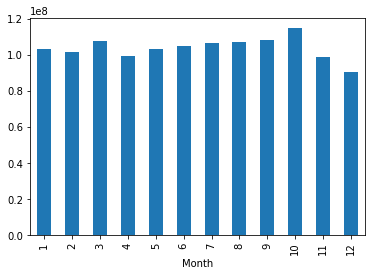

In [21]:
#plot a bar graph 
month_groups.plot(kind = 'bar')
plt.show()

In [28]:
#need to add in the seasons based of the months
season_dict = {
    1:'Winter',
    2:'Winter',
    3:'Spring',
    4:'Spring',
    5:'Spring',
    6:'Summer',
    7:'Summer',
    8:'Summer',
    9:'Fall',
    10:'Fall',
    11:'Fall',
    12:'Winter'
}

In [29]:
#add in the seasons dictionary to the data frame
new_monthly_df['season'] = new_monthly_df.Month.apply(lambda x:season_dict[x])
new_monthly_df

,Station ID,Station Name_x,Month Date,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides,Monthly Total,Year,Month,L Color,season
0,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Red, Purple , Yellow Lines",Winter
4,40900,Howard,2014-02-01,6334.2,4197.3,3195.5,156254,2014,2,"Red, Purple , Yellow Lines",Winter
8,40900,Howard,2014-03-01,6336.1,4662.6,3404.4,173393,2014,3,"Red, Purple , Yellow Lines",Spring
12,40900,Howard,2014-04-01,6281.5,4641.5,3398.3,170351,2014,4,"Red, Purple , Yellow Lines",Spring
16,40900,Howard,2014-05-01,6336.4,4546.4,3408.0,172836,2014,5,"Red, Purple , Yellow Lines",Spring
...,...,...,...,...,...,...,...,...,...,...,...
25084,41700,Washington/Wabash,2020-08-01,2410.4,1564.0,1230.6,64591,2020,8,"Brown, Green, Orange, Purple , Pink Lines",Summer
25086,41700,Washington/Wabash,2020-09-01,2707.4,1909.8,1438.6,71688,2020,9,"Brown, Green, Orange, Purple , Pink Lines",Fall
25088,41700,Washington/Wabash,2020-10-01,2666.5,1791.6,1243.0,72593,2020,10,"Brown, Green, Orange, Purple , Pink Lines",Fall
25090,41700,Washington/Wabash,2020-11-01,2297.0,1657.3,1067.8,58975,2020,11,"Brown, Green, Orange, Purple , Pink Lines",Fall


In [30]:
#now groupby seasons in order to create a seasons bar graph
seasons_group = new_monthly_df.groupby('season')
seasons_groups = seasons_group['Monthly Total'].sum()

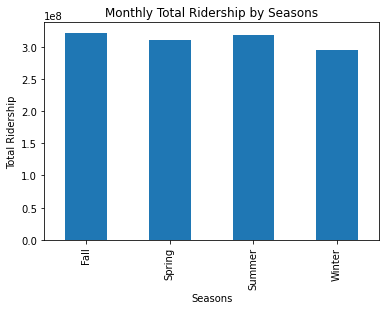

In [106]:
#create the seasons bar graph
seasons_groups.plot(kind = 'bar', title = 'Monthly Total Ridership by Seasons', xlabel = 'Seasons', ylabel = 'Total Ridership')
plt.show()

In [74]:
#create data frames to compare 2019 and 2020 specifically
monthly_df2019 = new_monthly_df[(new_monthly_df['Month Date']>= '2019-01-01') & (new_monthly_df['Month Date']<='2019-12-01')]
monthly_df2020 = new_monthly_df[(new_monthly_df['Month Date']>= '2020-01-01') & (new_monthly_df['Month Date']<='2020-12-01')]

In [78]:
monthly_df2020

,Station ID,Station Name_x,Month Date,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides,Monthly Total,Year,Month,L Color,season
288,40900,Howard,2020-01-01,4801.2,2852.0,2304.4,128557,2020,1,"Red, Purple , Yellow Lines",Winter
292,40900,Howard,2020-02-01,4883.6,3056.0,2408.3,122584,2020,2,"Red, Purple , Yellow Lines",Winter
296,40900,Howard,2020-03-01,3207.8,1984.8,1744.0,87230,2020,3,"Red, Purple , Yellow Lines",Spring
300,40900,Howard,2020-04-01,1307.5,1016.5,791.8,35999,2020,4,"Red, Purple , Yellow Lines",Spring
304,40900,Howard,2020-05-01,1354.9,1019.8,773.7,36838,2020,5,"Red, Purple , Yellow Lines",Spring
...,...,...,...,...,...,...,...,...,...,...,...
25084,41700,Washington/Wabash,2020-08-01,2410.4,1564.0,1230.6,64591,2020,8,"Brown, Green, Orange, Purple , Pink Lines",Summer
25086,41700,Washington/Wabash,2020-09-01,2707.4,1909.8,1438.6,71688,2020,9,"Brown, Green, Orange, Purple , Pink Lines",Fall
25088,41700,Washington/Wabash,2020-10-01,2666.5,1791.6,1243.0,72593,2020,10,"Brown, Green, Orange, Purple , Pink Lines",Fall
25090,41700,Washington/Wabash,2020-11-01,2297.0,1657.3,1067.8,58975,2020,11,"Brown, Green, Orange, Purple , Pink Lines",Fall


In [83]:
#merge those two data frames through concat
monthly19_20 = pd.concat([monthly_df2019, monthly_df2020], ignore_index = True)
monthly19_20

,Station ID,Station Name_x,Month Date,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides,Monthly Total,Year,Month,L Color,season
0,40900,Howard,2019-01-01,4649.0,3064.5,2364.8,126361,2019,1,"Red, Purple , Yellow Lines",Winter
1,40900,Howard,2019-02-01,5172.0,3179.8,2394.3,125736,2019,2,"Red, Purple , Yellow Lines",Winter
2,40900,Howard,2019-03-01,5188.7,3357.4,2515.2,138325,2019,3,"Red, Purple , Yellow Lines",Spring
3,40900,Howard,2019-04-01,5255.9,3380.0,2553.8,139365,2019,4,"Red, Purple , Yellow Lines",Spring
4,40900,Howard,2019-05-01,5362.7,3615.8,2777.4,146330,2019,5,"Red, Purple , Yellow Lines",Spring
...,...,...,...,...,...,...,...,...,...,...,...
3499,41700,Washington/Wabash,2020-08-01,2410.4,1564.0,1230.6,64591,2020,8,"Brown, Green, Orange, Purple , Pink Lines",Summer
3500,41700,Washington/Wabash,2020-09-01,2707.4,1909.8,1438.6,71688,2020,9,"Brown, Green, Orange, Purple , Pink Lines",Fall
3501,41700,Washington/Wabash,2020-10-01,2666.5,1791.6,1243.0,72593,2020,10,"Brown, Green, Orange, Purple , Pink Lines",Fall
3502,41700,Washington/Wabash,2020-11-01,2297.0,1657.3,1067.8,58975,2020,11,"Brown, Green, Orange, Purple , Pink Lines",Fall


In [87]:
#now groupby year, months in order to create a comparison bar graph between the two years
twenty19_group = monthly19_20.groupby(['Year','Month'])
monthly_total = twenty19_group['Monthly Total'].sum()

In [88]:
monthly_total

Year  Month
2019  1        13710357
      2        13995221
      3        15390699
      4        15646627
      5        16426468
      6        16028126
      7        16382591
      8        16636016
      9        16465083
      10       17693201
      11       14970531
      12       13714483
2020  1        14668912
      2        13964912
      3         8419418
      4         1985175
      5         1957403
      6         2568549
      7         3700899
      8         3700062
      9         3961260
      10        4129337
      11        3321924
      12        3212677
Name: Monthly Total, dtype: int64

<AxesSubplot:title={'center':'Monthly Total Ridership from 2019 to 2020'}, xlabel='Years', ylabel='Total Ridership'>

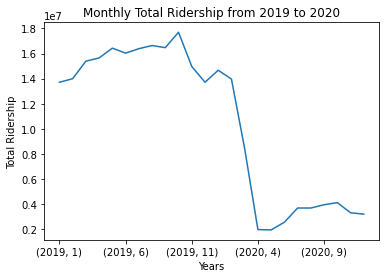

In [108]:
monthly_total.plot(kind = 'line', title = 'Monthly Total Ridership from 2019 to 2020', xlabel = 'Years', ylabel = 'Total Ridership')

In [80]:
twenty19_group = monthly_df2019.groupby(['Month'])
monthly_total19 = twenty19_group['Monthly Total'].sum()
monthly_total19

Month
1     13710357
2     13995221
3     15390699
4     15646627
5     16426468
6     16028126
7     16382591
8     16636016
9     16465083
10    17693201
11    14970531
12    13714483
Name: Monthly Total, dtype: int64

In [81]:
twenty20_group = monthly_df2020.groupby(['Month'])
monthly_total20 = twenty20_group['Monthly Total'].sum()
monthly_total20

Month
1     14668912
2     13964912
3      8419418
4      1985175
5      1957403
6      2568549
7      3700899
8      3700062
9      3961260
10     4129337
11     3321924
12     3212677
Name: Monthly Total, dtype: int64

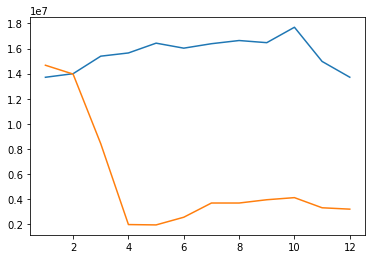

In [113]:
plt.plot(monthly_total19)
plt.plot(monthly_total20)
plt.show()